**Telco Customer Churn Data**

Dataset:This dataset captures comprehensive information about customers and their interactions with a service provider. The data includes details on customer churn, the array of services each customer has signed up for, account information, and demographic characteristics. Below is a breakdown of the key elements in the dataset


Column Name: Churn
Description: Indicates whether a customer has left within the last month. This binary variable serves as a crucial indicator for customer retention analysis.


Others Columns: Phone, Multiple Lines, Internet, Online Security, Online Backup, Device Protection, Tech Support, Streaming TV and Movies

Description: Provides information on the specific services that each customer has subscribed to. This categorical data allows for an in-depth analysis of service adoption patterns.

Customer Account Information:
Columns: Customer Tenure, Contract, Payment Method, Paperless Billing, Monthly Charges, Total Charges
Description: Encompasses details about the customer's account, including how long they've been a customer, contract type, preferred payment method, paperless billing preference, and financial aspects such as monthly and total charges.

Demographic Information:

Columns: Gender, Age Range, Partners, Dependents
Description: Captures demographic attributes of customers, including gender, age range, and whether they have partners and dependents. This information is vital for understanding the customer base and tailoring services accordingly.

**Business problem **: The primary business problem in this dataset is to understand and mitigate customer churn. By analyzing factors such as service usage, account information, and demographics, the goal is to identify patterns and predictors of churn. This information can then be leveraged to implement targeted strategies, improve customer retention, and optimize service offerings to enhance overall business profitability and customer satisfaction.


In [2]:
#importing all library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import math

In [3]:
df = pd.read_csv("/content/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
#again check null values
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [ ]:
# check duplicate
df.duplicated().sum()

0

In [ ]:
#Descriptive statistics of variable
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


As we notice, only three columns have numeric data types; so  start  to check df by exploring them first

In [ ]:
df["SeniorCitizen"].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

its show it have two distinct value , lets convert it to ctagorical

In [ ]:
df["SeniorCitizen"] = df["SeniorCitizen"].apply(lambda x: "no" if x == 0 else "yes")

df["SeniorCitizen"].value_counts()

no     5901
yes    1142
Name: SeniorCitizen, dtype: int64

# Lets check any variavle truly numeric but data type object , by check total df i found total charges variable contain numeric values , lets convert it

In [ ]:
#replace any empty space witjjh 0 and change to numeric
df = df.replace({'TotalCharges': {" ": "0"}})
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])
df.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2279.734304
std,24.559481,30.090047,2266.794470
min,0.000000,18.250000,0.000000
25%,9.000000,35.500000,398.550000
50%,29.000000,70.350000,1394.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Visualize and analyze univariate
First visualize numeric


array([[<Axes: title={'center': 'tenure'}>,
        <Axes: title={'center': 'MonthlyCharges'}>],
       [<Axes: title={'center': 'TotalCharges'}>, <Axes: >]], dtype=object)

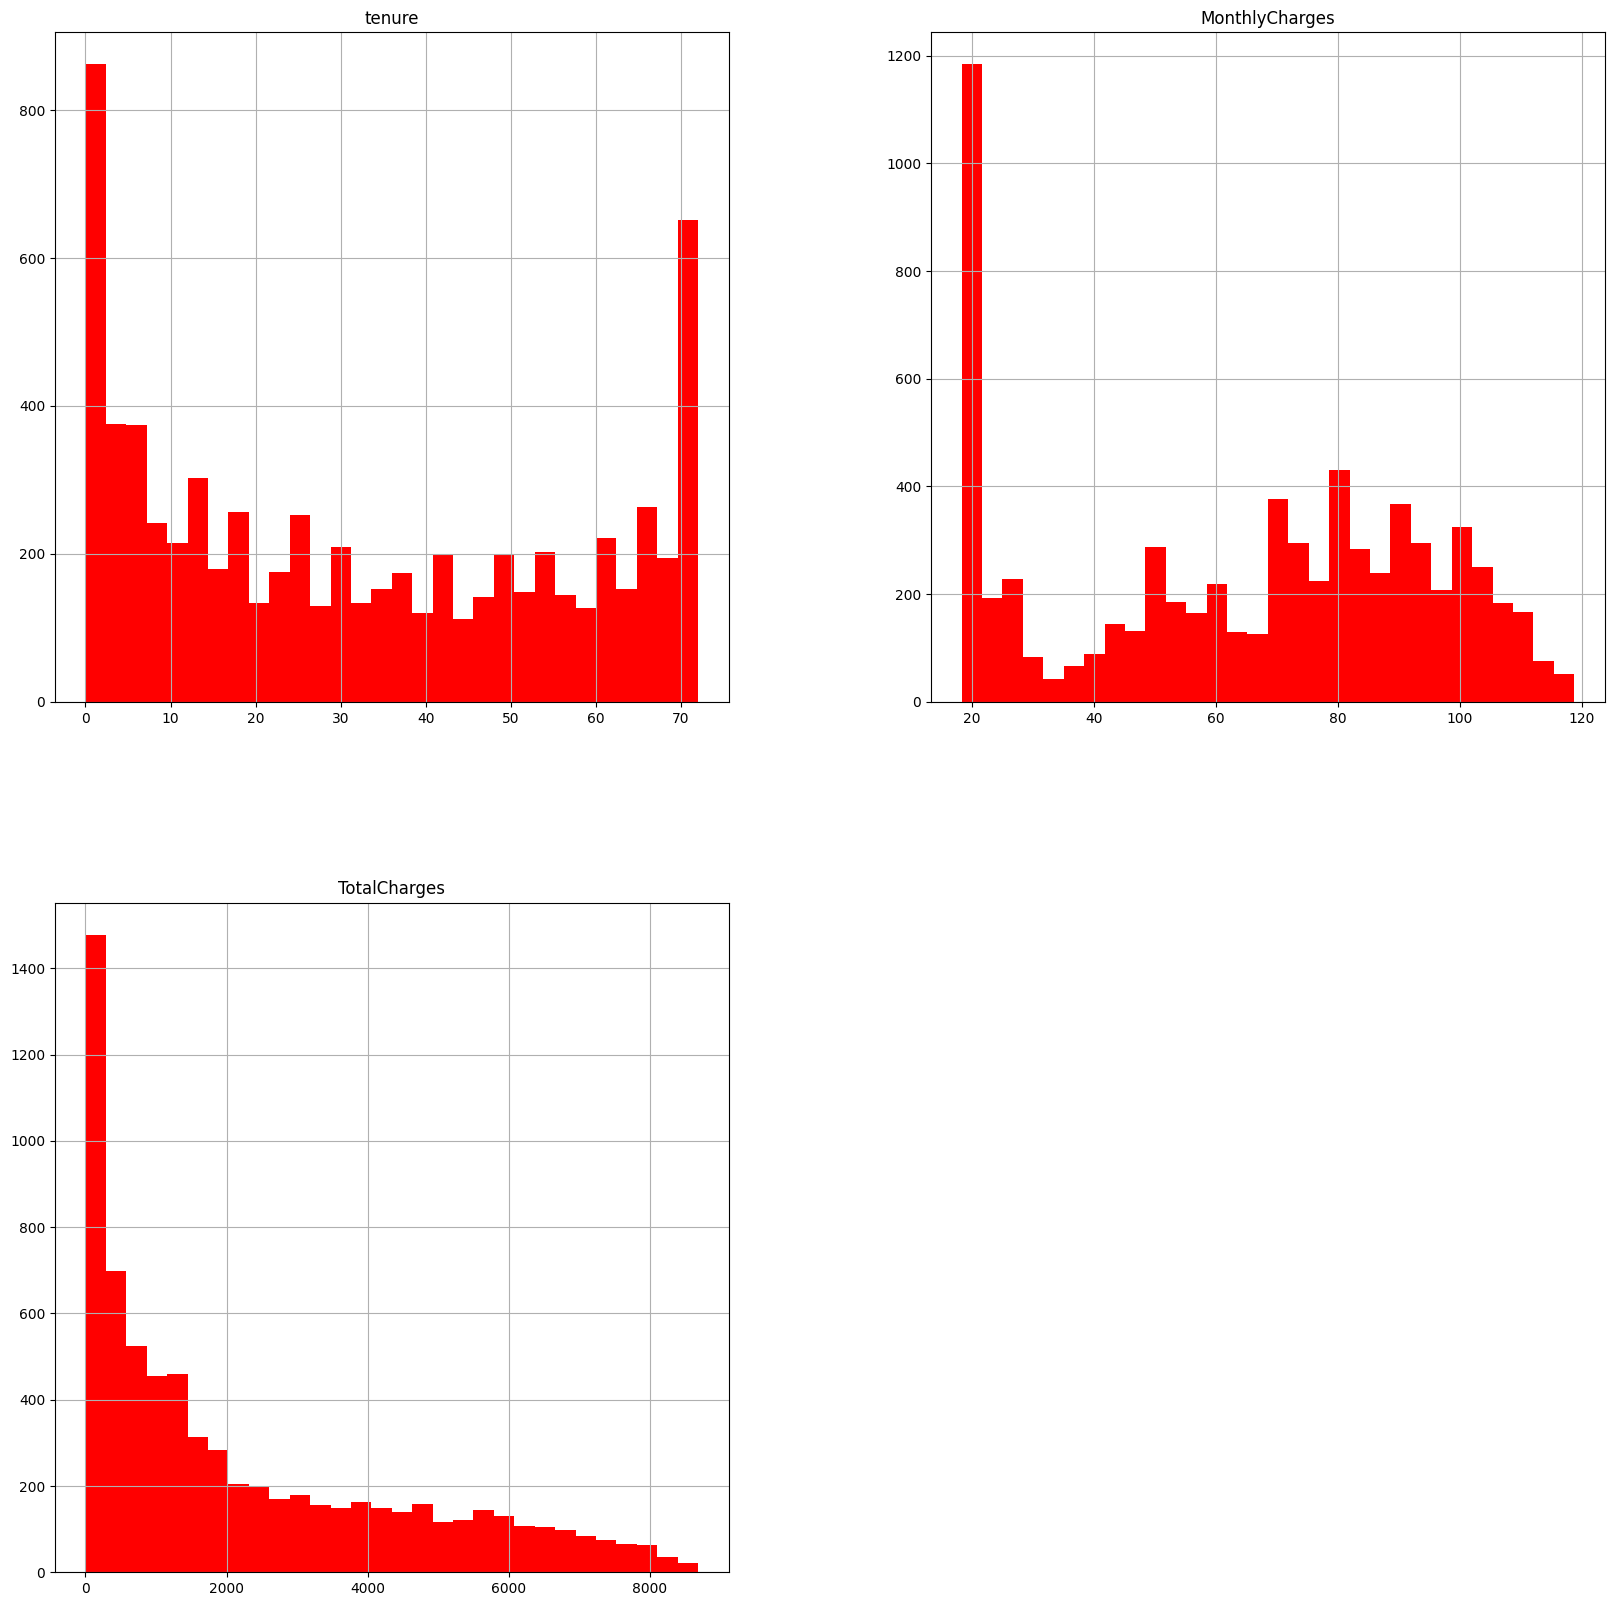

In [ ]:
# check how  this variable distributed
df.hist(bins = 30, figsize = (20,20), color = 'r')

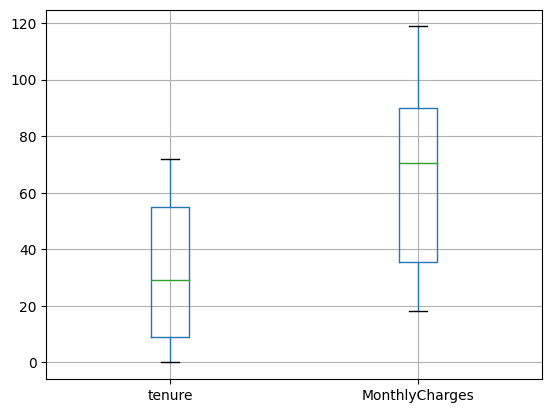

In [ ]:
#visualize with box plot
df.boxplot(["tenure", "MonthlyCharges"])
plt.show()

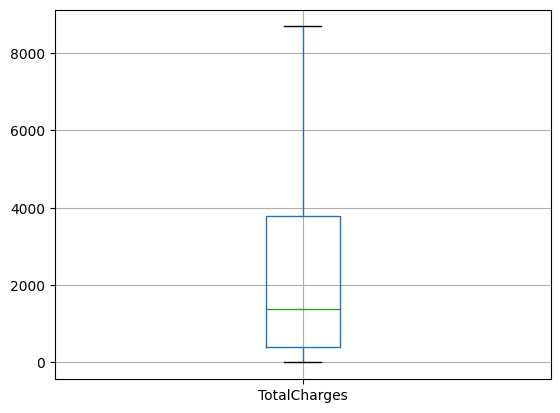

In [ ]:
df.boxplot(["TotalCharges"])
plt.show()

Insight:By analyzing Histogram and box plot , I saw there is no ouliar in numeric variable   and monthly charges is kind of normal distribution means the data point is close around the mean and other variable has large variation and skewed.

<ipython-input-92-55bef464468c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlations = df.corr()


<Axes: >

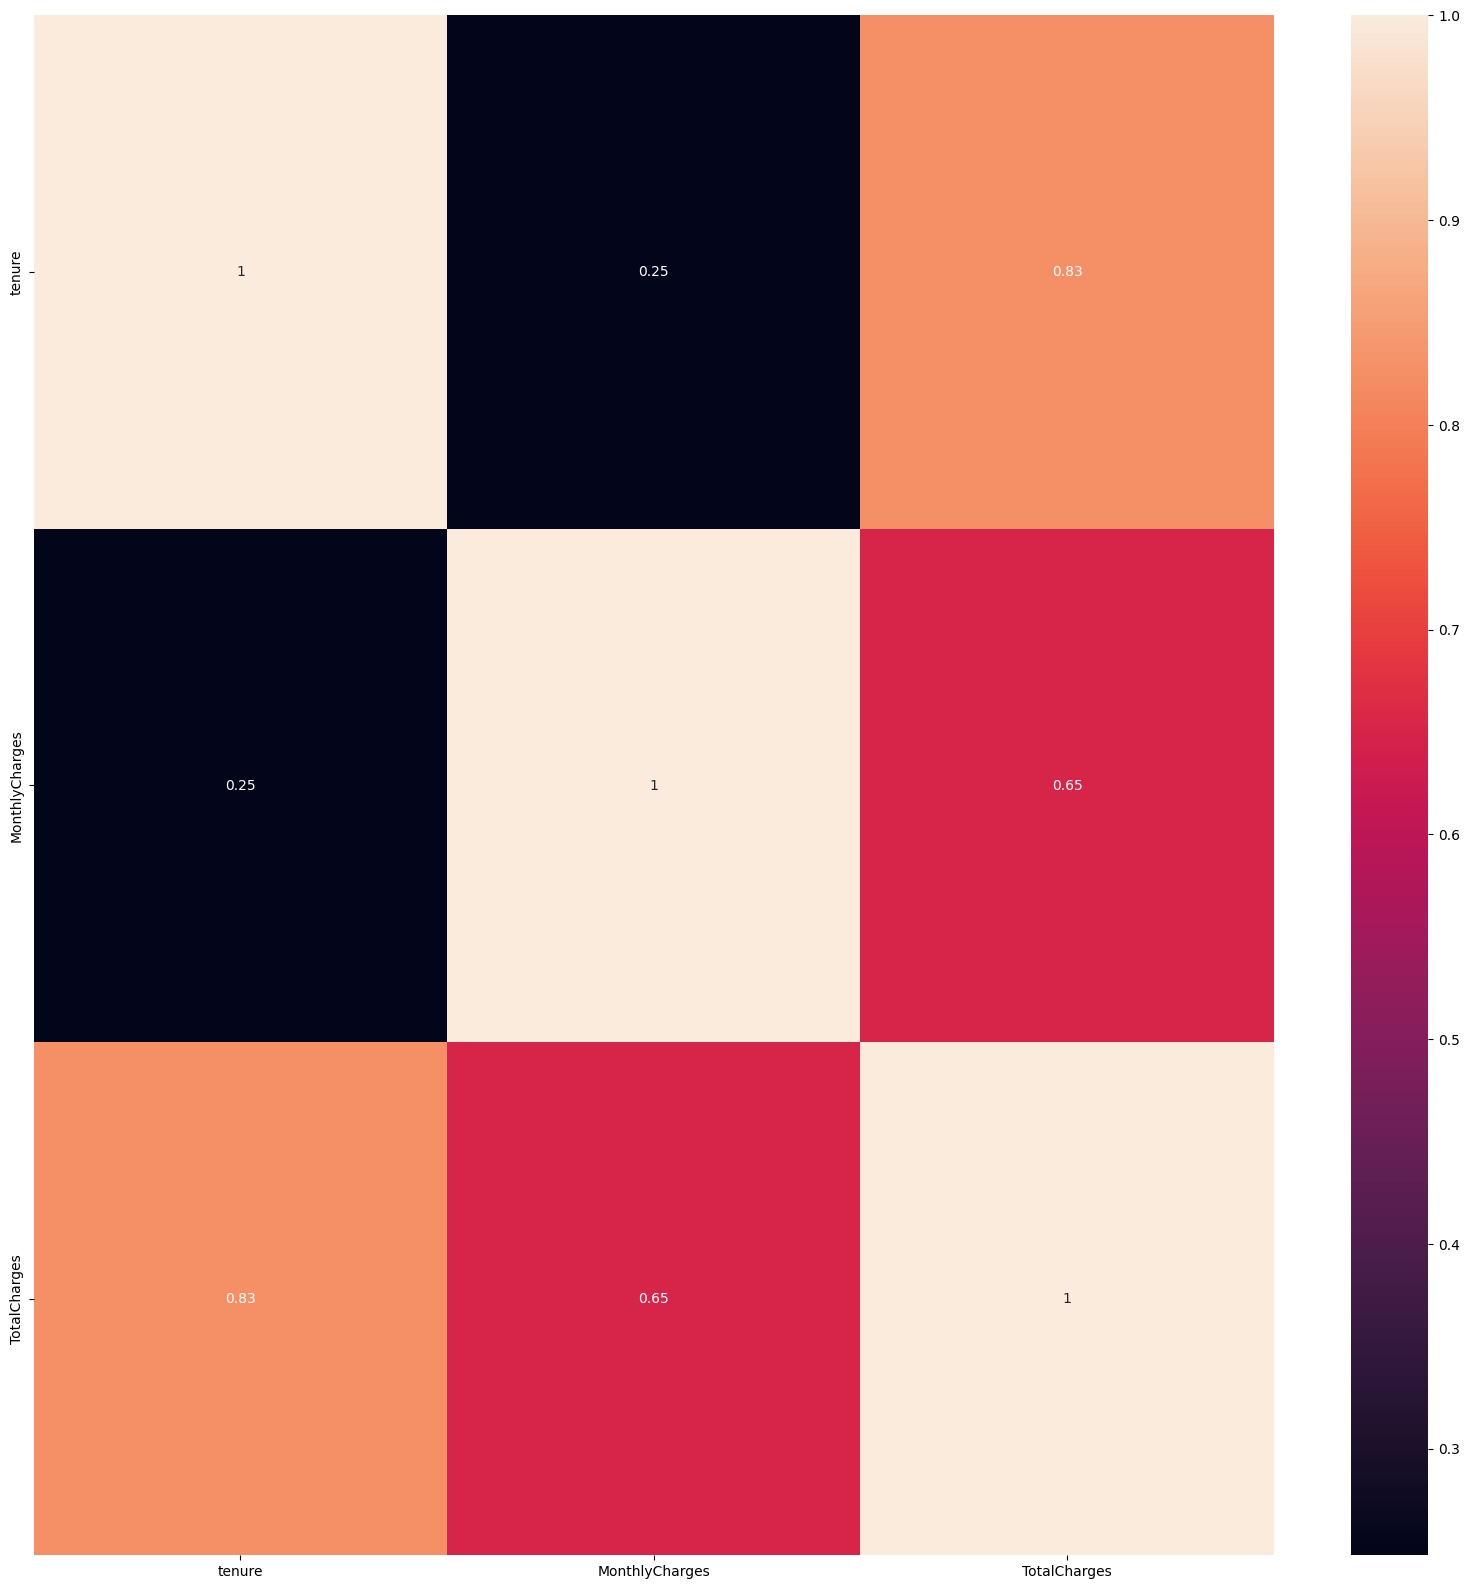

In [ ]:
#check corelation among variable
correlations = df.corr()
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(correlations, annot = True)

Insight: in heat map analysis , saw that this njumerical variable has interrelationship


In [ ]:
# delete customer_id as its have no effect on churn
df = df.drop(columns=["customerID"])
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

#Visulize the catakgorical variable

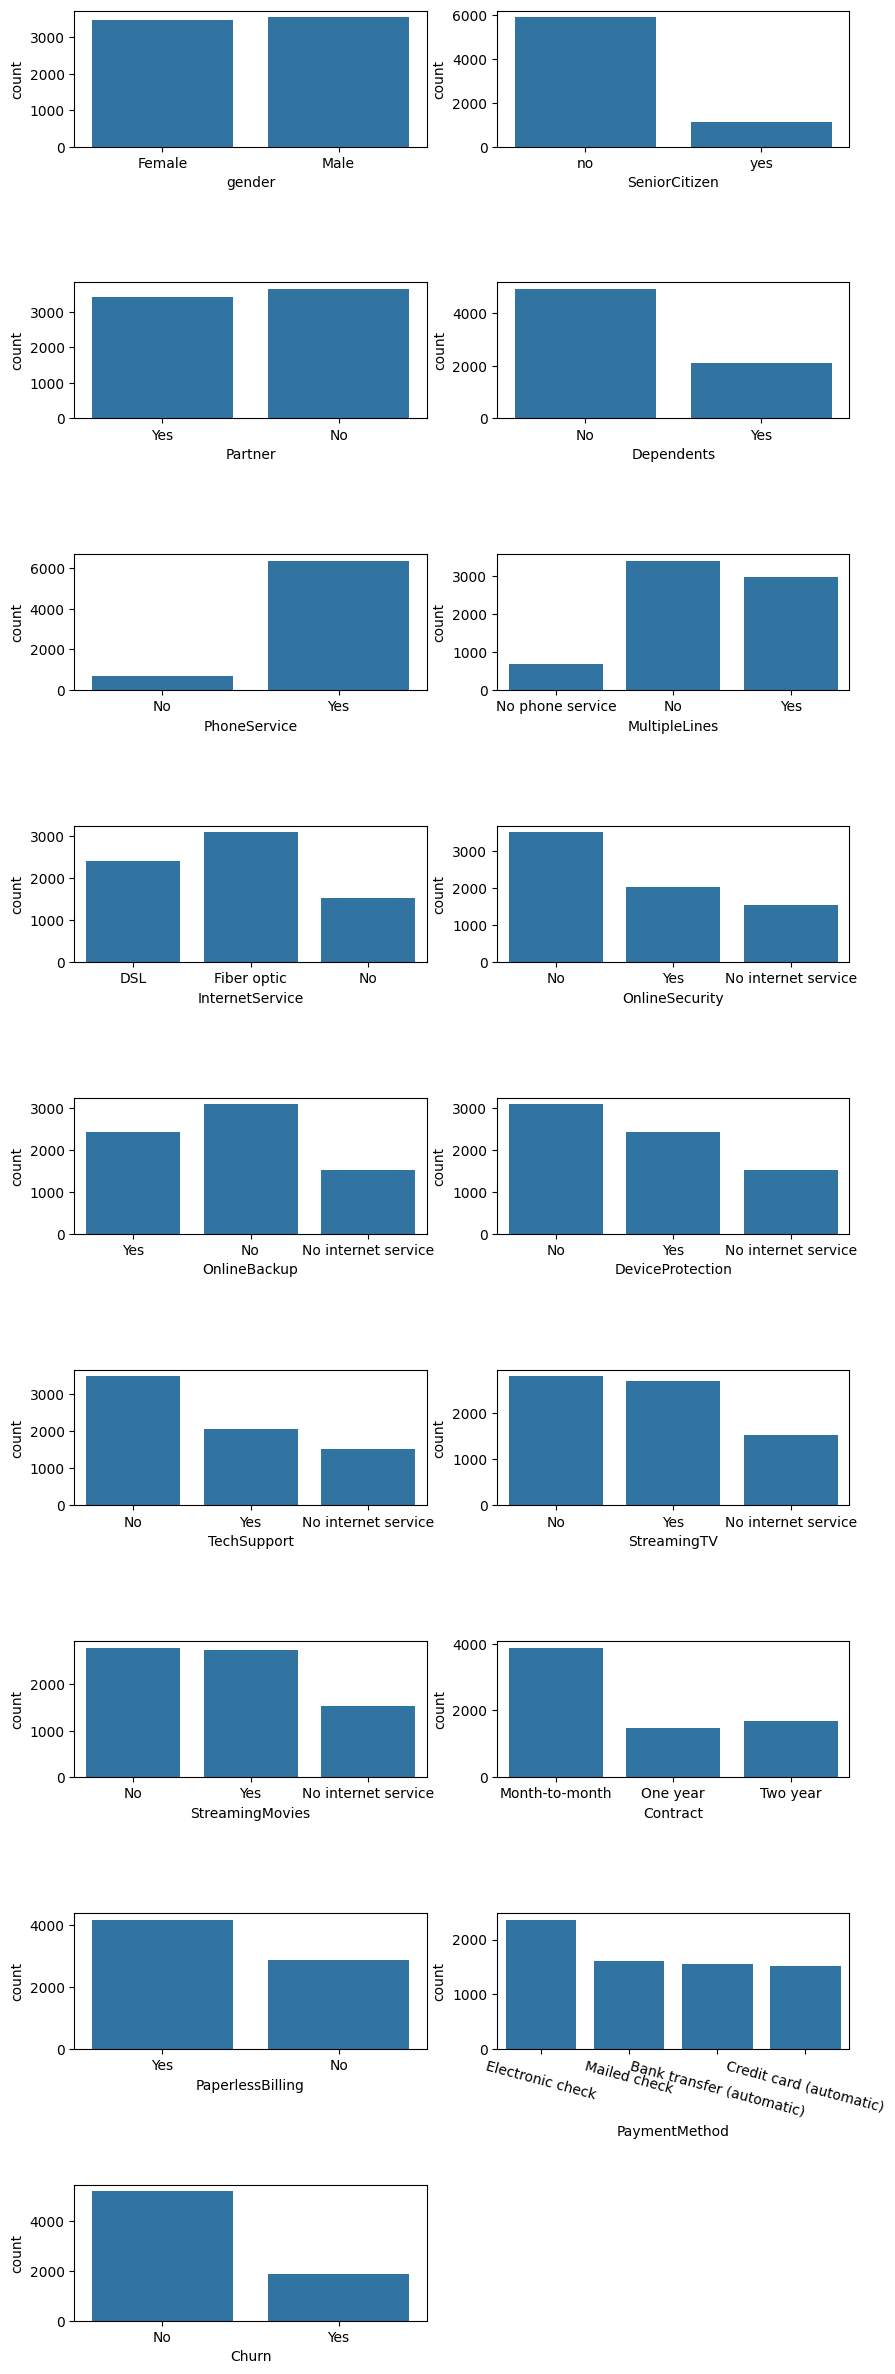

In [ ]:
categorical_cols = df.select_dtypes(include=[object])
num_cat_cols = len(categorical_cols.columns)

fig2, axis2 = plt.subplots(math.ceil(num_cat_cols/2), 2, figsize=(10, 30))

for idx, cat_col in enumerate(categorical_cols):
    row, col = idx//2, idx%2
    sns.countplot(x=cat_col, data=categorical_cols, ax=axis2[row, col])
    if cat_col == "PaymentMethod":
        axis2[row, col].tick_params(axis='x', labelrotation=-15)

axis2[8,1].set_axis_off()
plt.subplots_adjust(hspace=1)

insight: This catagorical univariate analysis show how the variable values is count or frequency .

Check relationship with churn with bivariate and multivariate analysis

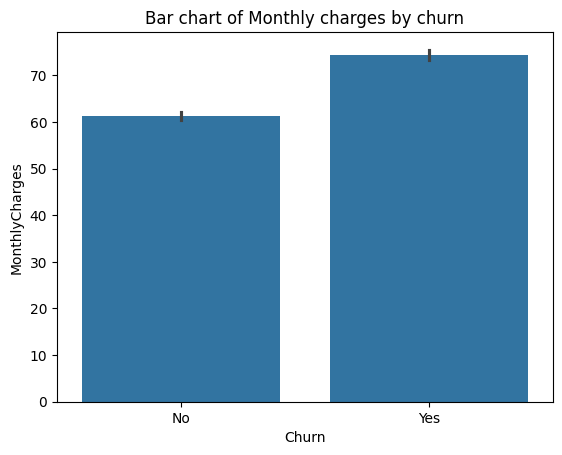

In [ ]:
sns.barplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Bar chart of Monthly charges by churn')
plt.show()

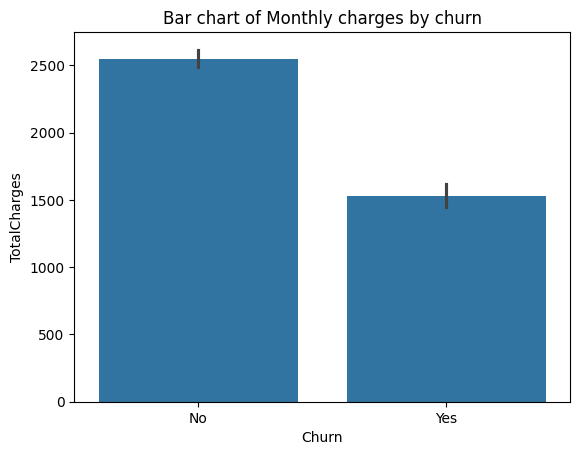

In [ ]:
sns.barplot(x='Churn', y='TotalCharges', data=df)
plt.title('Bar chart of Monthly charges by churn')
plt.show()

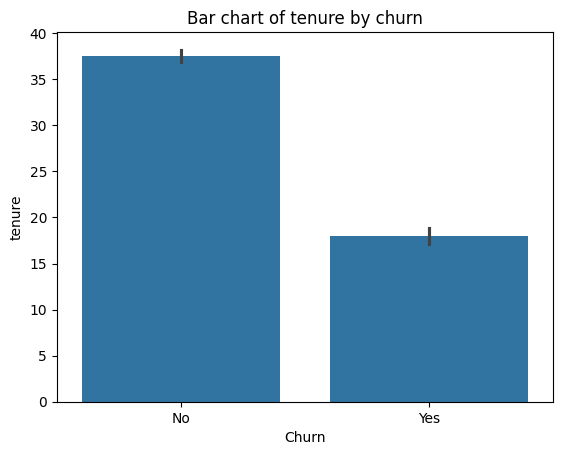

In [4]:
sns.barplot(x='Churn', y='tenure', data=df)
plt.title('Bar chart of tenure by churn')
plt.show()

Insight: in this bi-variate analysis , I found that , customer with churn more with monthly charges. the total charges customer not likely to churn and and the customer with high tenure not likely to churn


Lets check the relationship with chrn with catagorical variable

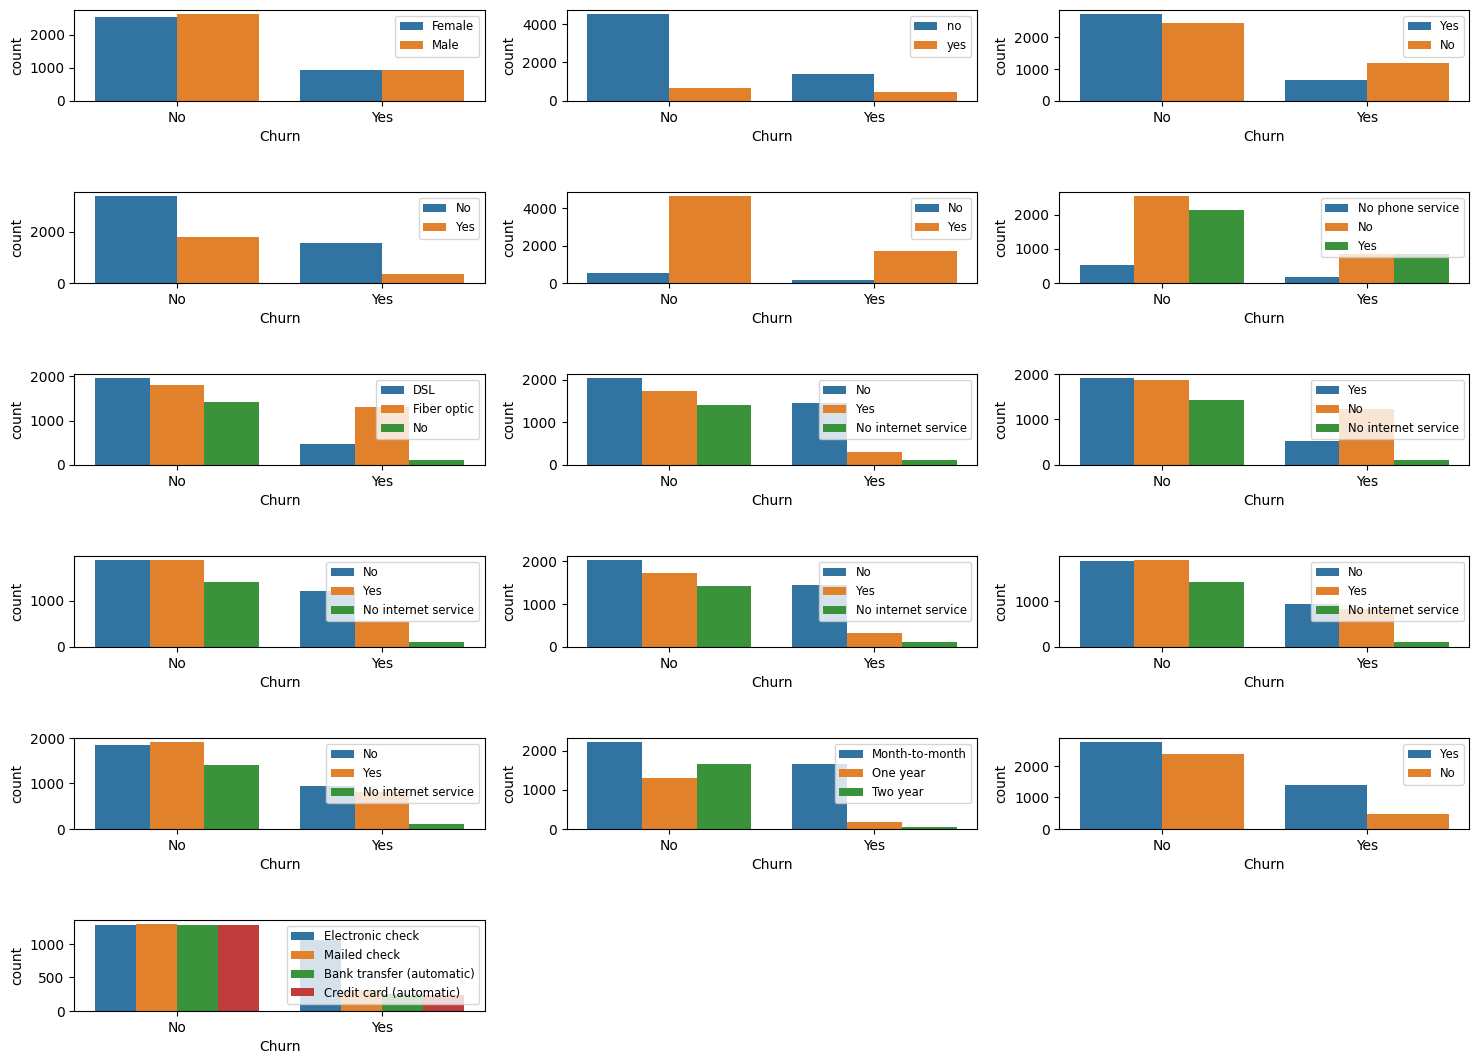

In [ ]:
categorical_cols = df.select_dtypes(include=[object]).drop(columns=["Churn"])
num_cat_cols = len(categorical_cols.columns)

fig3, axis3 = plt.subplots(math.ceil(num_cat_cols/3), 3, figsize=(18, 13))

for idx, cat_col in enumerate(categorical_cols):
    row, col = idx//3, idx%3
    sns.countplot(x='Churn', hue=cat_col, data=df, ax=axis3[row, col])
    axis3[row, col].legend(loc='upper right', fontsize='small')

axis3[5,1].set_axis_off()
axis3[5,2].set_axis_off()
plt.subplots_adjust(hspace=1)

Insight: its not clear the relationship above figure

Lets do the chi-square test and determine the catagorical varible for model

In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
for col in categorical_cols:
    print(f"checking the association between {col} and Churn")
    contingency_table = pd.crosstab(categorical_cols[col], df['Churn'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    print(f"Chi-square value: {chi2}")
    print(f"P-value: {p}")
    if p < 0.05:
        print(f"null hypothesis rejected, there is an association between {col} and churn")
    else:
        print(f"null hypothesis can not be rejected, can not prove the association")


checking the association between gender and Churn
Chi-square value: 0.4840828822091383
P-value: 0.48657873605618596
null hypothesis can not be rejected, can not prove the association
checking the association between SeniorCitizen and Churn
Chi-square value: 159.42630036838742
P-value: 1.510066805092378e-36
null hypothesis rejected, there is an association between SeniorCitizen and churn
checking the association between Partner and Churn
Chi-square value: 158.7333820309922
P-value: 2.1399113440759935e-36
null hypothesis rejected, there is an association between Partner and churn
checking the association between Dependents and Churn
Chi-square value: 189.12924940423474
P-value: 4.9249216612154196e-43
null hypothesis rejected, there is an association between Dependents and churn
checking the association between PhoneService and Churn
Chi-square value: 0.9150329892546948
P-value: 0.3387825358066928
null hypothesis can not be rejected, can not prove the association
checking the association 

Insight: Found that gender and phone service have no relationship with churn according to condition

# delete the column which has no relation with churn
Gender and phone service

In [ ]:
df = df.drop(['gender', 'PhoneService'], axis=1)


In [ ]:
df.columns

Index(['SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges',
       'Churn'],
      dtype='object')

In [ ]:
df2 = df.copy()

Before starting the modeling part,

we have to recode all the categorical variables into numeric because we can't feed categorical data to the model
Scale numerical features

In [ ]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
df_encoded = pd.get_dummies(df, columns=categorical_cols)
df_encoded = df_encoded.astype(int)
df_encoded.head()
df_encoded['Churn'] = df2['Churn']

In [ ]:
df_encoded = df_encoded.drop('Churn_Yes',axis=1)
df_encoded = df_encoded.drop('Churn_No',axis=1)

In [ ]:
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_no,SeniorCitizen_yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn,Churn_numeric
0,1,29,29,1,0,0,1,1,0,0,...,0,0,0,1,0,0,1,0,No,0
1,34,56,1889,1,0,1,0,1,0,1,...,1,0,1,0,0,0,0,1,No,0
2,2,53,108,1,0,1,0,1,0,1,...,0,0,0,1,0,0,0,1,Yes,1
3,45,42,1840,1,0,1,0,1,0,0,...,1,0,1,0,1,0,0,0,No,0
4,2,70,151,1,0,1,0,1,0,1,...,0,0,0,1,0,0,1,0,Yes,1


In [ ]:
df_encoded.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen_no',
       'SeniorCitizen_yes', 'Partner_No', 'Partner_Yes', 'Dependents_No',
       'Dependents_Yes', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaperlessBilling_No', 'PaperlessBilling_Yes',
       '

In [ ]:
df_encoded = df_encoded.drop('Churn',axis=1)

In [ ]:
#scaling
from sklearn.preprocessing import MinMaxScaler
numeric_cols = df_encoded.select_dtypes(include=['int']).columns.tolist()
scaler = MinMaxScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])
df_encoded.head()

,tenure,MonthlyCharges,TotalCharges,SeniorCitizen_no,SeniorCitizen_yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,MultipleLines_No,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_numeric
0,0.013889,0.11,0.003339,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,0.472222,0.38,0.217526,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.027778,0.35,0.012437,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0
3,0.625000,0.24,0.211884,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.027778,0.52,0.017388,1.0,0.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


Applyiyng all clasifier model

In [ ]:
#seperate dependent and independent variable
X = df_encoded.drop('Churn_numeric', axis=1)
y = df_encoded['Churn_numeric']

In [ ]:
# spliting test train data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Initialize a dictionary to store the accuracy scores
accuracy_scores = {}

# Define the classifier models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'Support Vector Machine': SVC(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB()
}

# Iterate over each model
for model_name, model in models.items():
    # Fit the model on the training data
    model.fit(X_train, y_train)
    # Make predictions on the test data
    y_pred = model.predict(X_test)
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    # Store the accuracy score in the dictionary
    accuracy_scores[model_name] = accuracy

# Sort the accuracy scores in descending order
sorted_scores = sorted(accuracy_scores.items(), key=lambda x: x[1], reverse=True)

# Print the ranking and accuracy scores of the models
print("Model Rankings based on Accuracy Score:")
for rank, (model_name, accuracy) in enumerate(sorted_scores, start=1):
    print(f"Rank {rank}: {model_name} - Accuracy: {accuracy:.4f}")

# Print all the accuracy scores
print("\nAll Accuracy Scores:")
for model_name, accuracy in accuracy_scores.items():
    print(f"{model_name}: {accuracy:.4f}")

Model Rankings based on Accuracy Score:
Rank 1: Logistic Regression - Accuracy: 0.8204
Rank 2: Support Vector Machine - Accuracy: 0.8034
Rank 3: Random Forest - Accuracy: 0.7906
Rank 4: K-Nearest Neighbors - Accuracy: 0.7729
Rank 5: Decision Tree - Accuracy: 0.7388
Rank 6: Naive Bayes - Accuracy: 0.6948

All Accuracy Scores:
Random Forest: 0.7906
Logistic Regression: 0.8204
Support Vector Machine: 0.8034
K-Nearest Neighbors: 0.7729
Decision Tree: 0.7388
Naive Bayes: 0.6948


Insight: we find that Logistic regression accuracy higher than the other which showes .8204, Lets evalute this model

In [ ]:
logistic_model = LogisticRegression(max_iter=1000)

In [ ]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
y_pred = logistic_model.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

In [ ]:
print(f"Accuracy: {accuracy}")
print(f"Classification Report:\n{classification_report_str}")

Accuracy: 0.8204400283889283
Classification Report:
              precision    recall  f1-score   support

         0.0       0.86      0.90      0.88      1036
         1.0       0.69      0.59      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.82      1409



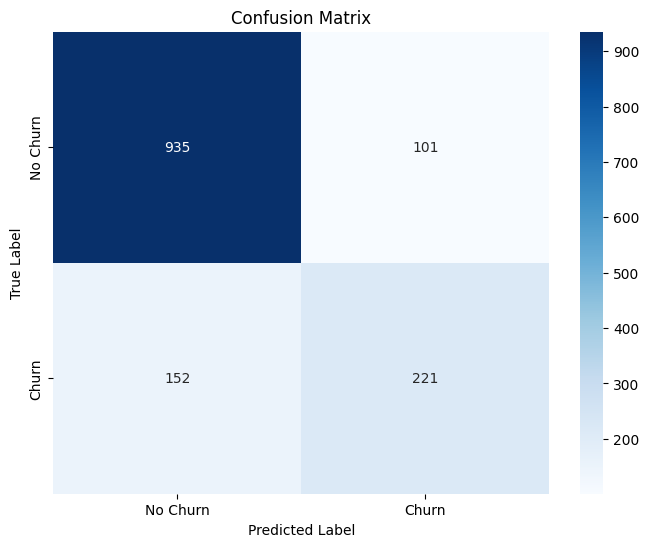

In [ ]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['No Churn', 'Churn'], yticklabels=['No Churn', 'Churn'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve

In [ ]:
# Compute the False Positive Rate (FPR), True Positive Rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [ ]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7475014750483919

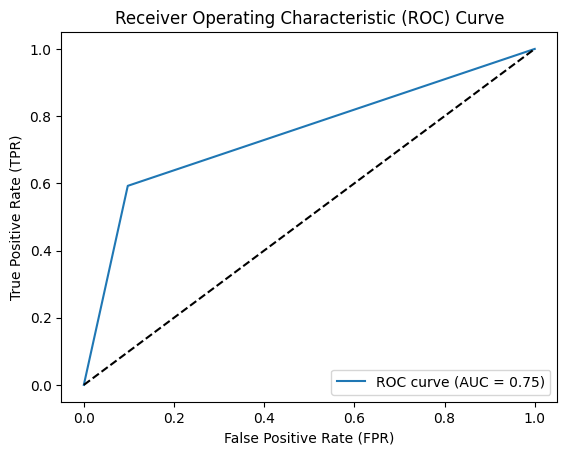

In [ ]:
# Plotting the ROC curve
plt.plot(fpr, tpr, label='ROC curve (AUC = {:.2f})'.format(auc))
plt.plot([0, 1], [0, 1], 'k--') # Random guess line
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

Conclusion :An AUC of 0.75 means that the model has a 75% chance of correctly ranking a positive and a negative example. This is generally considered a good performance,